## 1. Loading and Preprocessing 

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Drop the species column
# (Species is not included in the DataFrame since we're using only the features for clustering)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Clustering Algorithm Implementation 

### A) KMeans Clustering 
#### Description of KMeans Clustering
KMeans clustering is a partitioning method that divides the dataset into K distinct, non-overlapping subsets (clusters). The algorithm works by:

* Randomly initializing K centroids.
* Assigning each data point to the nearest centroid based on the Euclidean distance.
* Recalculating the centroids as the mean of the assigned points.
* Iterating the assignment and update steps until convergence (i.e., no changes in cluster assignments).

#### Suitability for the Iris Dataset
KMeans is suitable for the Iris dataset because:

* It has well-defined clusters (setosa, versicolor, and virginica) based on the features (sepal and petal lengths and widths).
* The dataset is relatively small and continuous, making it feasible for KMeans to efficiently find clusters.

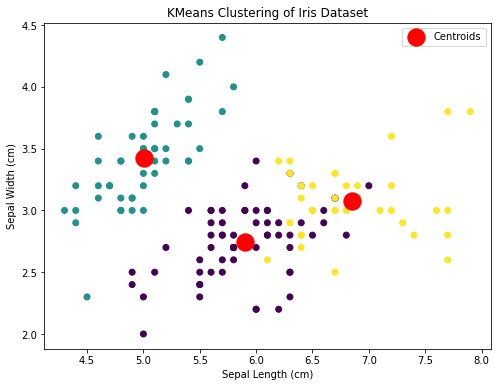

In [2]:
# Import KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_data)

# Add the cluster labels to the DataFrame
iris_data['Cluster'] = kmeans.labels_

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], c=iris_data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


### B) Hierarchical Clustering

#### Description of Hierarchical Clustering: 
Hierarchical clustering is a method that builds a hierarchy of clusters either through:

* Agglomerative Approach: Starting with individual points, merging them into clusters.
* Divisive Approach: Starting with one cluster and splitting it into smaller clusters.

Agglomerative clustering is more commonly used. It creates a dendrogram to illustrate the arrangement of clusters.

#### Suitability for the Iris Dataset:
Hierarchical clustering is suitable for the Iris dataset because:

* It allows for visual representation of the relationships between clusters through dendrograms.
* It does not require the number of clusters to be specified beforehand.

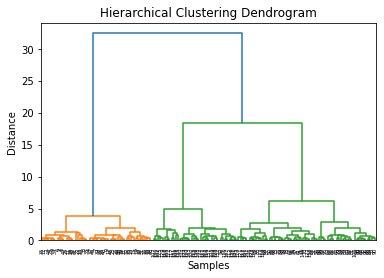

In [3]:
# Import necessary libraries for Hierarchical Clustering
import scipy.cluster.hierarchy as sch

# Apply Hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='ward'))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
